In [20]:
# source: https://softhints.com/merge-multiple-json-files-pandas-dataframe/
import numpy as np
import pandas as pd
import glob, os, json

json_dir = './data/json'
dir_list = glob.glob(os.path.join(json_dir, 'search_*'))

In [21]:
data_list = [] # list of dicts
for dir in dir_list:
    file_list = glob.glob(os.path.join(dir, '*.json'))
    result_count = 0
    name = ""
    for file in file_list:
        f = open(file) # file is a path to a json file
        data = json.load(f)
        name = file.split('/')[-2].split('search_')[-1]
        result_count = result_count + data['meta']['result_count']
        f.close()
    data_list.append({'name': name, 'result_count': result_count})

In [22]:
count_data = pd.DataFrame(data_list)
print(count_data.head())
print(f'data: {count_data.shape}')

  name  result_count
0                  0
1                  0
2                  0
3                  0
4                  0
data: (2198, 2)


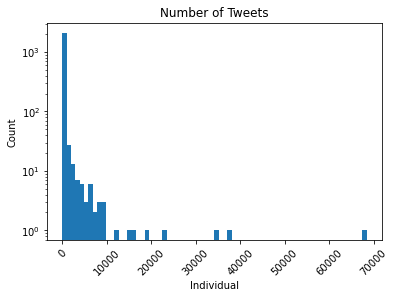

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Number of Tweets')
plt.yscale('log')
plt.hist(count_data['result_count'], bins=70)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Individual')
plt.show()